In [49]:
import pandas as pd

obesity_data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

print('Number of rows:', obesity_data.shape[0])

Number of rows: 2111


In [50]:
obesity_data.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [51]:
# Calculate the MBI for each row and assign it to a new column called 'MBI'
obesity_data['MBI'] = obesity_data['Weight'] / (obesity_data['Height'] ** 2)

# Create a new column called 'MBI_category' that categorizes each row based on its MBI
obesity_data.loc[obesity_data['MBI'] < 18.5, 'MBI_category'] = 'Insufficient_Weight'
obesity_data.loc[(obesity_data['MBI'] >= 18.5) & (obesity_data['MBI'] < 25.0), 'MBI_category'] = 'Normal_Weight'
obesity_data.loc[(obesity_data['MBI'] >= 25.0) & (obesity_data['MBI'] < 27.5), 'MBI_category'] = 'Overweight_Level_I'
obesity_data.loc[(obesity_data['MBI'] >= 27.5) & (obesity_data['MBI'] < 30.0), 'MBI_category'] = 'Overweight_Level_II'
obesity_data.loc[(obesity_data['MBI'] >= 30.0) & (obesity_data['MBI'] < 35.0), 'MBI_category'] = 'Obesity_Type_I'
obesity_data.loc[(obesity_data['MBI'] >= 35.0) & (obesity_data['MBI'] < 40.0), 'MBI_category'] = 'Obesity_Type_II'
obesity_data.loc[obesity_data['MBI'] >= 40, 'MBI_category'] = 'Obesity_Type_III'

In [28]:
category_ranges = {
    'Insufficient_Weight': (0, 18.5),
    'Normal_Weight': (18.5, 25.0),
    'Overweight_Level_I': (25.0, 27.5),
    'Overweight_Level_II': (27.5, 30.0),
    'Obesity_Type_I': (30.0, 35.0),
    'Obesity_Type_II': (35.0, 40.0),
    'Obesity_Type_III': (40.0, float('inf'))
}

# Iterate over each MBI category and remove outliers in that category
for category, (lower, upper) in category_ranges.items():
    outliers = obesity_data.loc[(obesity_data['NObeyesdad'] != category)
                                & (obesity_data['MBI_category'] == category)]
    
    outlier_indices = outliers.index
    obesity_data = obesity_data.drop(index=outlier_indices)

# Print the updated DataFrame
print('Number of rows:', obesity_data.shape[0])

Number of rows: 1941


C:\Users\Eduardo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Eduardo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


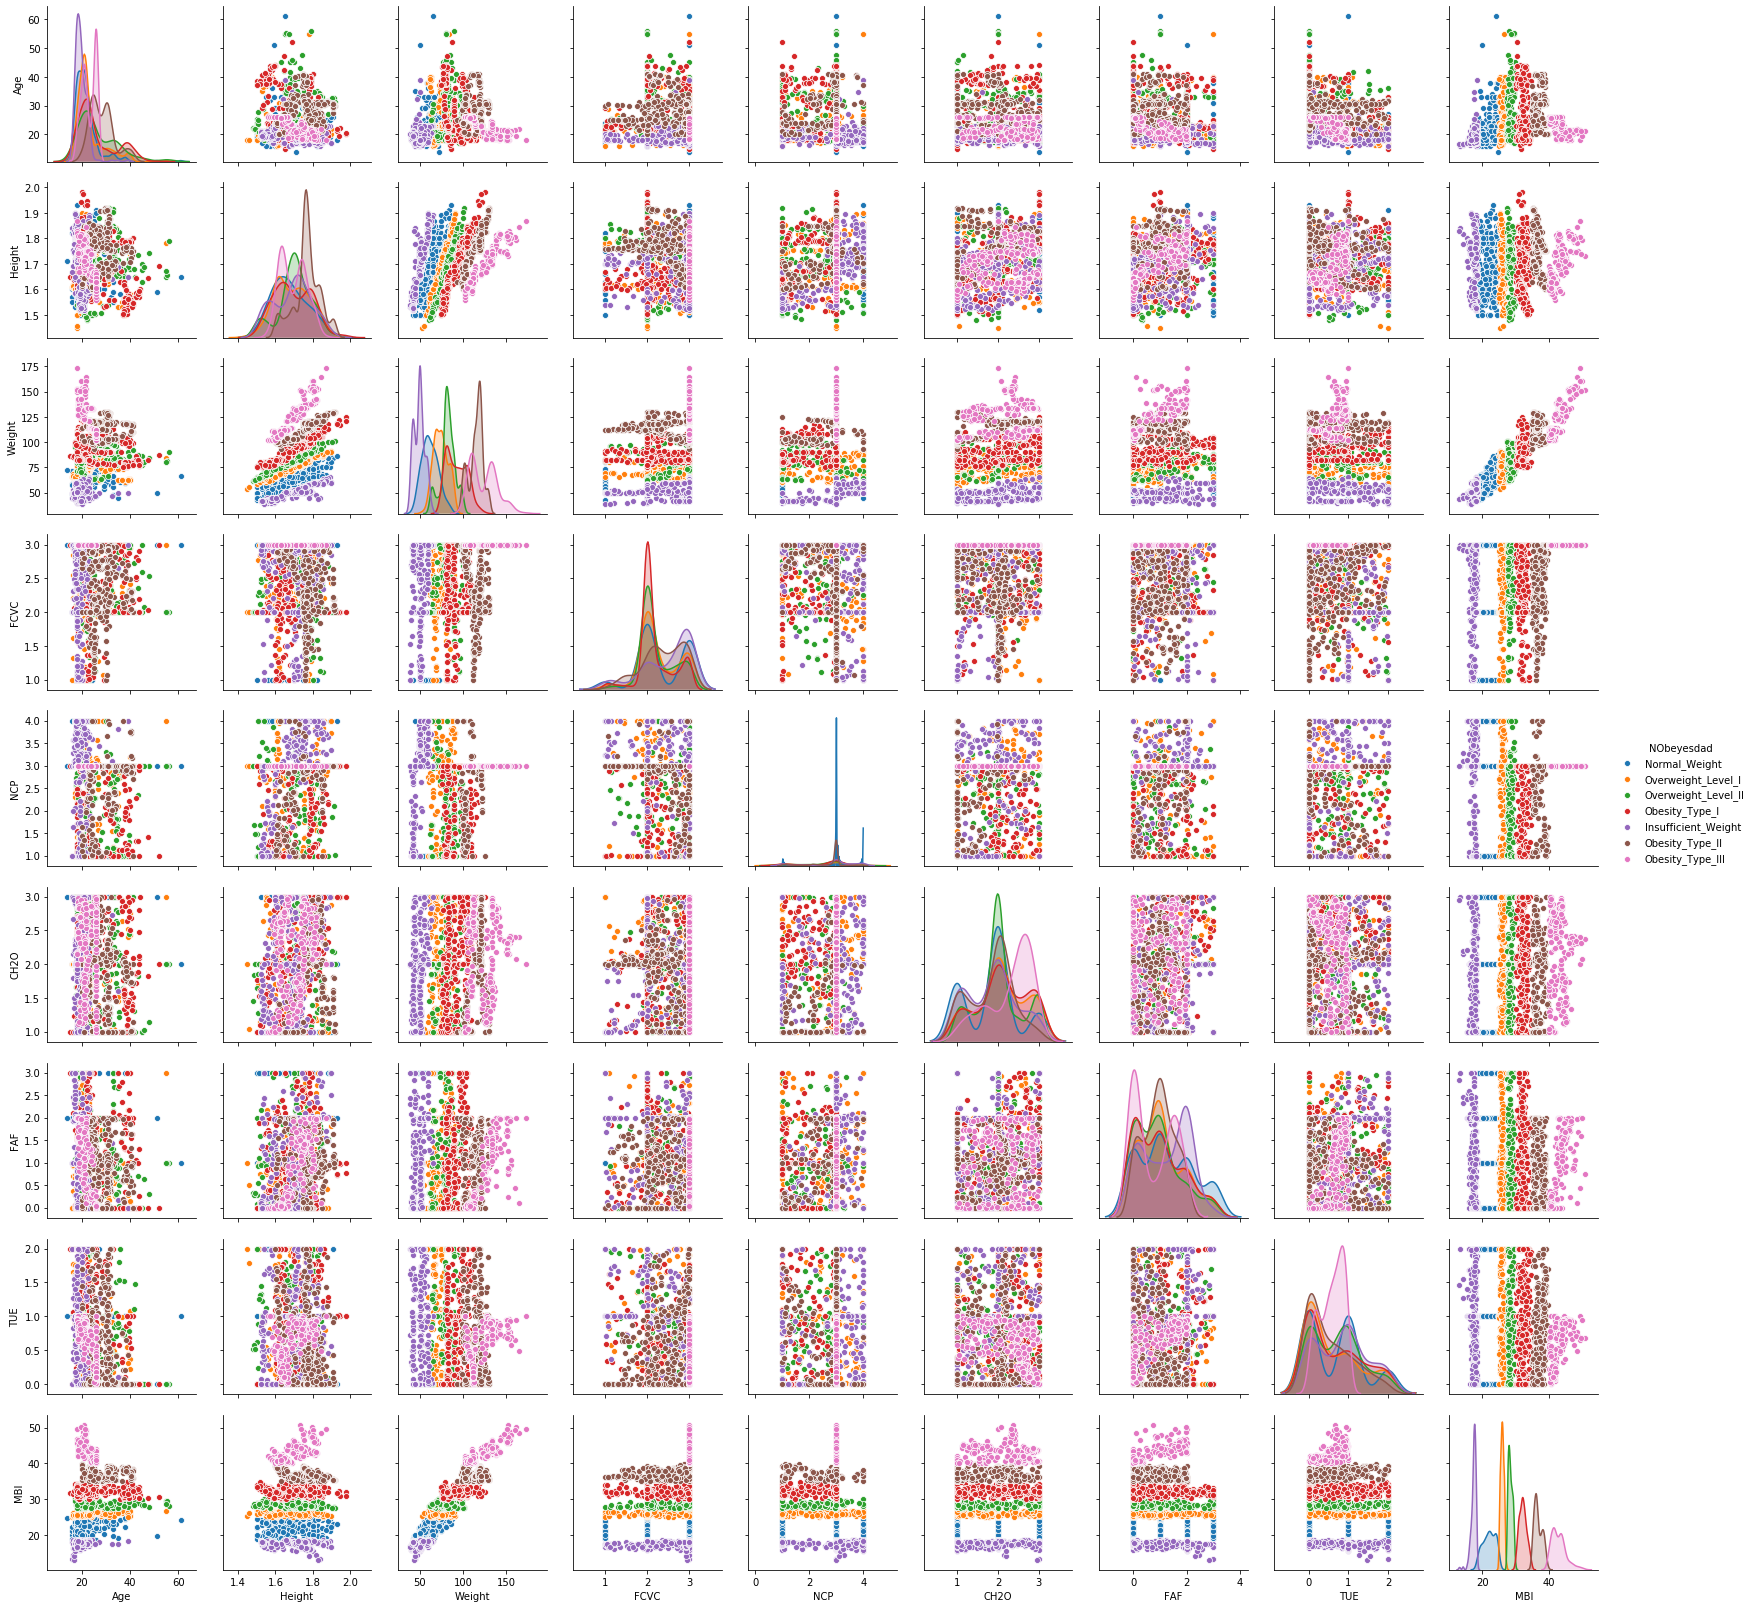

In [5]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

# We have to temporarily drop the rows with 'NA' values # because the Seaborn plotting 
# function does not know what to do with them
sb.pairplot(obesity_data, hue='NObeyesdad')

In [52]:
#Column has numerical values and we want to convert the to ordinal
obesity_data['MTRANS'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [53]:
#Column has numerical values and we want to convert the to ordinal
obesity_data['CAEC'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [54]:
#Column has numerical values and we want to convert the to ordinal
obesity_data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [55]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

#By giving a number to each option we are coverting the attributes to be ordinal
enc.fit(obesity_data['Gender'])
obesity_data['Gender'] = enc.transform(obesity_data['Gender'])

In [56]:
#Now Female is 0 and Male is 1
obesity_data['Gender'].unique()

array([0, 1])

In [57]:
enc.fit(obesity_data['MTRANS'])
obesity_data['MTRANS'] = enc.transform(obesity_data['MTRANS'])

In [58]:
obesity_data['MTRANS'].unique()

array([3, 4, 0, 2, 1])

In [59]:
#We now apply this method to every non numerical column 
enc.fit(obesity_data['family_history_with_overweight'])
obesity_data['family_history_with_overweight'] = enc.transform(obesity_data['family_history_with_overweight'])

enc.fit(obesity_data['FAVC'])
obesity_data['FAVC'] = enc.transform(obesity_data['FAVC'])

enc.fit(obesity_data['SMOKE'])
obesity_data['SMOKE'] = enc.transform(obesity_data['SMOKE'])

enc.fit(obesity_data['CAEC'])
obesity_data['CAEC'] = enc.transform(obesity_data['CAEC'])

enc.fit(obesity_data['SCC'])
obesity_data['SCC'] = enc.transform(obesity_data['SCC'])

enc.fit(obesity_data['CALC'])
obesity_data['CALC'] = enc.transform(obesity_data['CALC'])

In [60]:
obesity_data.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS           NObeyesdad  \
0  3.0     2      0   2.0    0  0.0  1.0     3       3        Normal_Weight   
1  3.0     2      1   3.0    1  3.0  0.0     2       3        Normal_Weight   
2  3.0     2      0   2.0    0  2.0  1.0     1       3        Normal_Weight   
3  3.0     2      0   2.0    0  2.0  0.0     1       4   Overweight_Level_I   
4  1.0     2      0   2.0    0  0.0  0.0     2       3  Overweight_Level_II   

         MBI         MBI_category  
0  24.386526        Normal_Weight  
1  24.238227        Normal_Weight  
2  23.765432        Normal_Weight  
3  26.851852   Overweight_Level_I  
4  28.342381  Overweight_Level_II

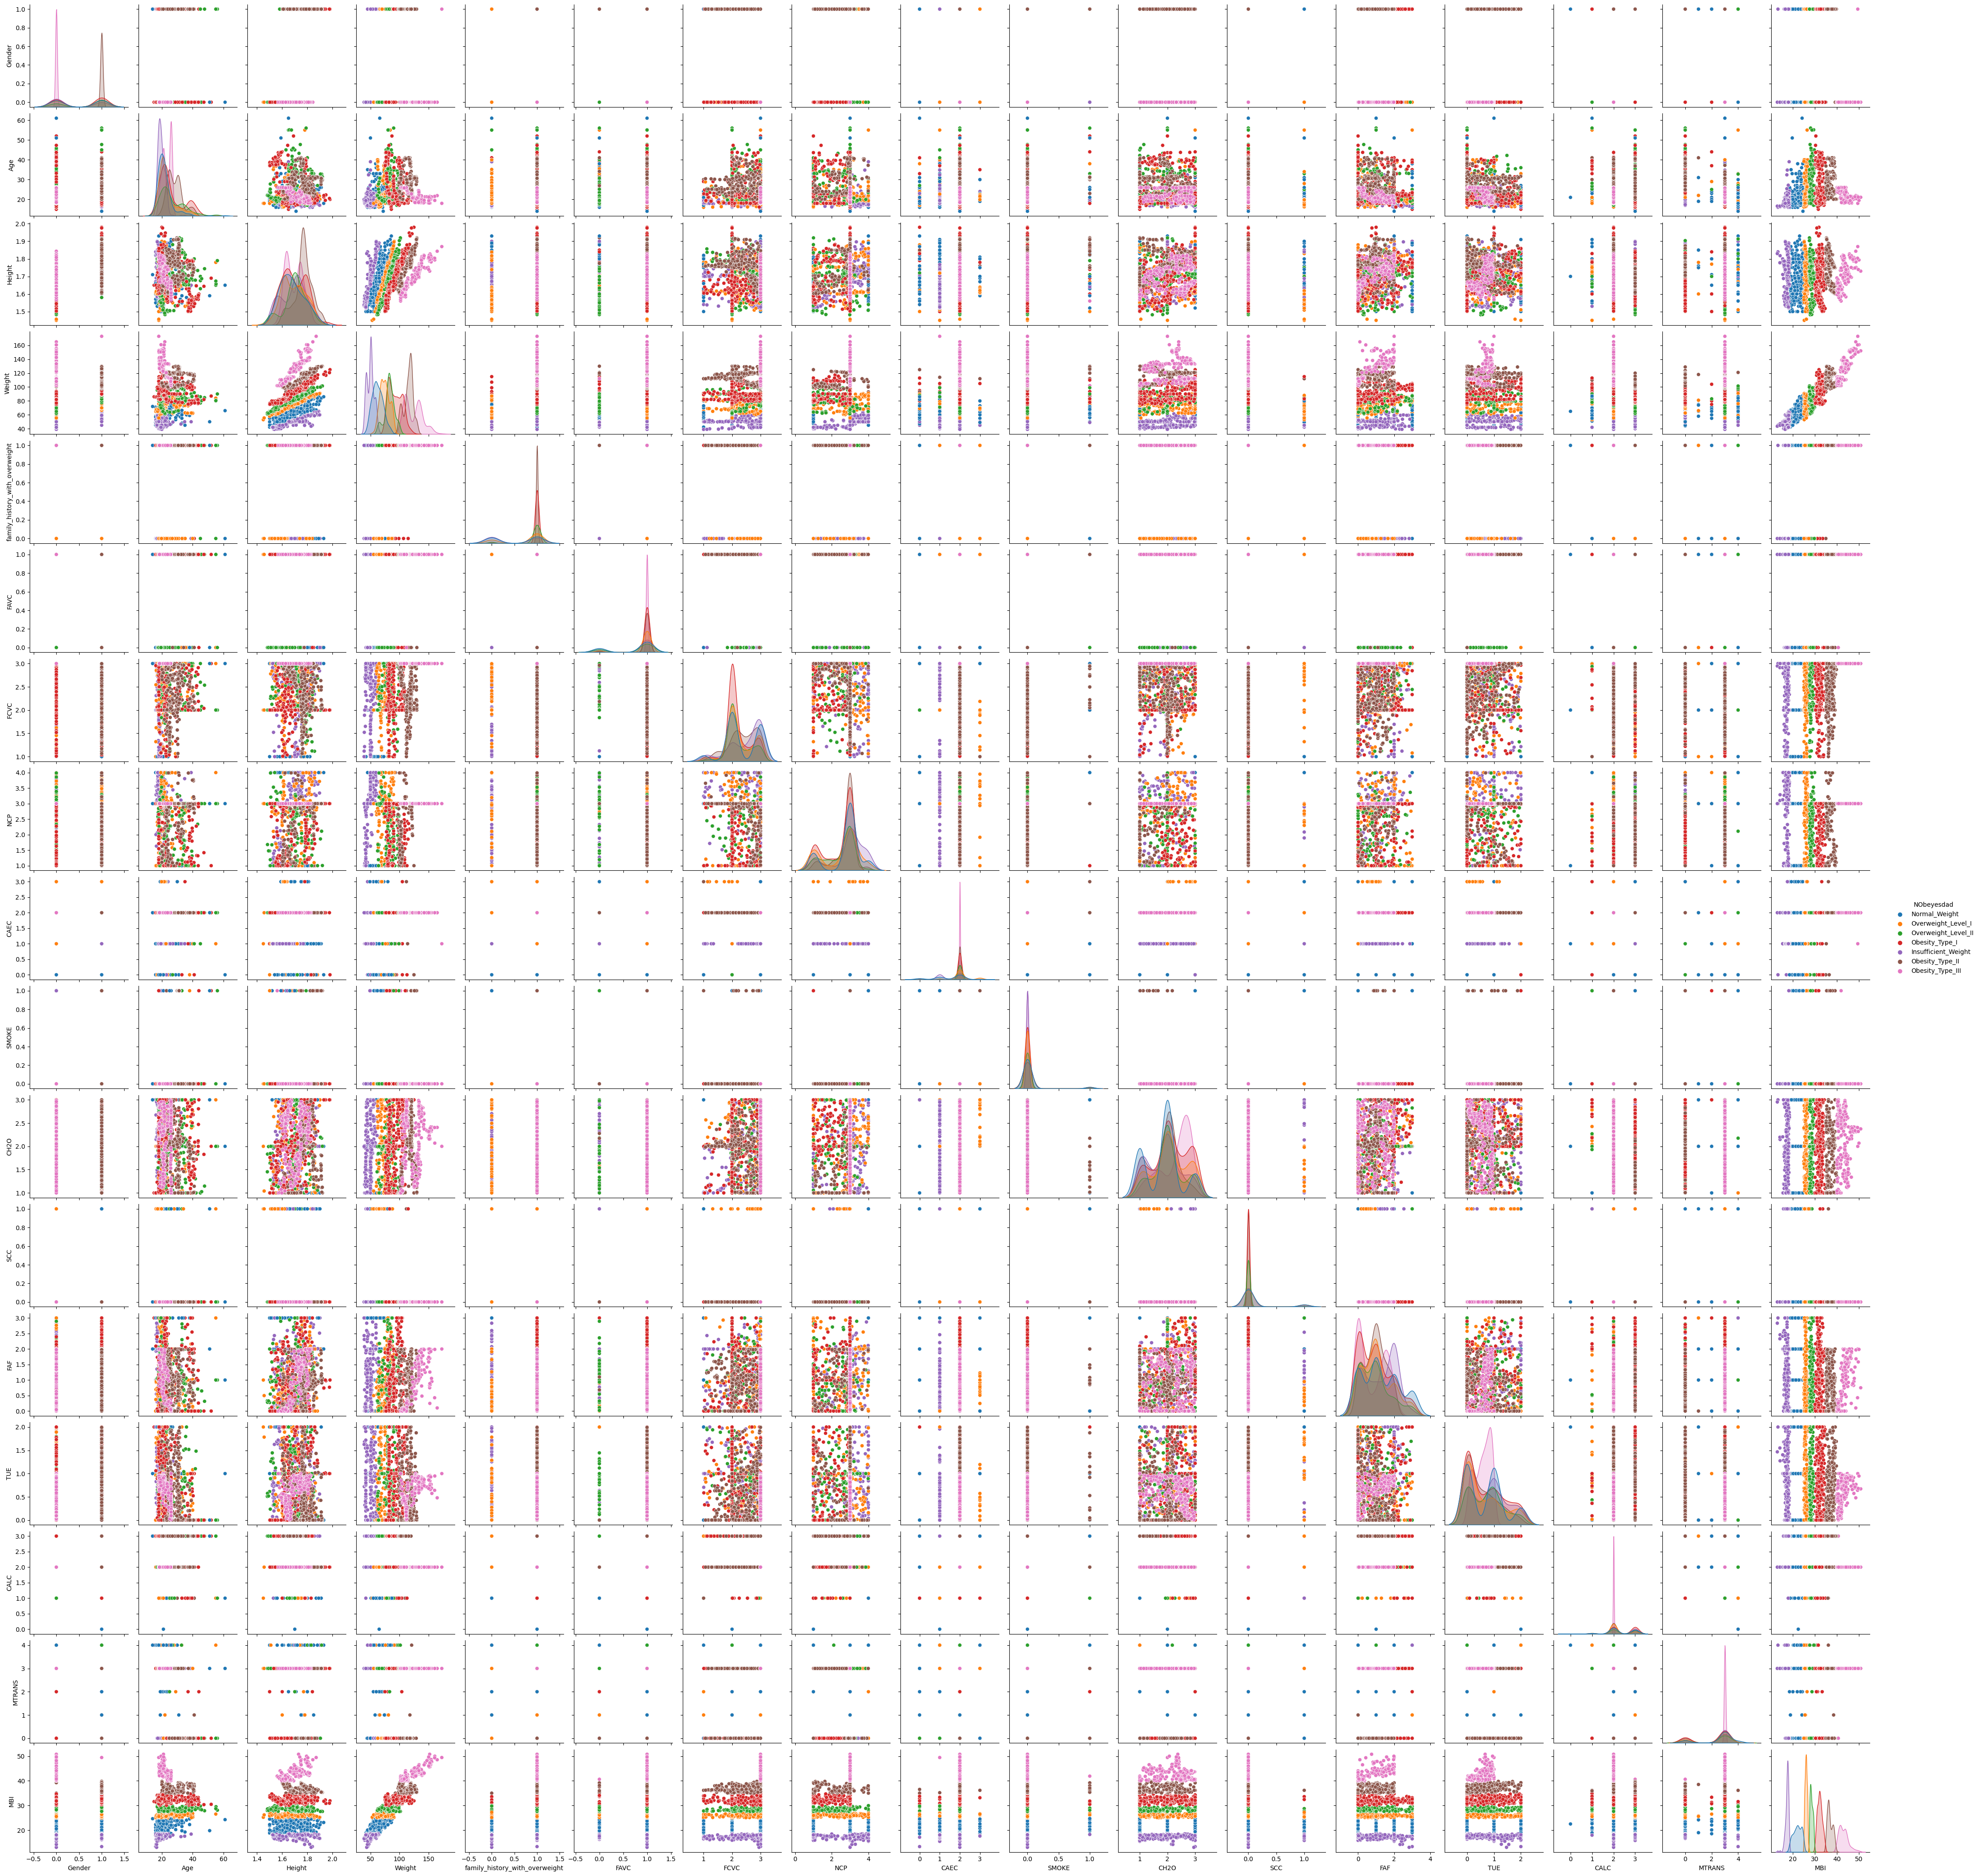

In [82]:
sb.pairplot(obesity_data, hue='NObeyesdad')

In [61]:
print('Number of rows:', obesity_data.shape[0])

Number of rows: 2111


In [120]:
# NOTE: test all the features with MBI with all the data
#    - this because if we clean the data with MBI and then we use it as a feature it will provoque overfitting

# all features without MBI (16 features)
#all_inputs = obesity_data[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']].values

# all features (17 features)
all_inputs = obesity_data[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'MBI']].values

# all features with MBI and without Height and Weight (15 features)
#all_inputs = obesity_data[['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'MBI']].values

# less features without MBI (13 features)
#all_inputs = obesity_data[['Gender', 'Age', 'Height', 'Weight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'FAF', 'CALC', 'MTRANS']].values

# less features with MBI and without Height and Weight (12 features)
#all_inputs = obesity_data[['Gender', 'Age', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'FAF', 'CALC', 'MTRANS', 'MBI']].values

# Similarly, we can extract the class labels
all_labels = obesity_data['NObeyesdad'].values

In [121]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

In [159]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#We start off using decision trees as tehy are a quick to train and have good performance
# Create the classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training set
clf.fit(training_inputs,training_classes)

# Validate the classifier on the testing set using classification accuracy
y_pred = clf.predict(testing_inputs)
print("Train data accuracy:",accuracy_score(y_true = training_classes, y_pred=clf.predict(training_inputs)))
print("Test data accuracy:",accuracy_score(y_true = testing_classes, y_pred=y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.9715909090909091


(array([  3.,   8.,  54.,  67., 140., 274., 208., 175.,  57.,  14.]),
 array([0.9469697 , 0.95151515, 0.95606061, 0.96060606, 0.96515152,
        0.96969697, 0.97424242, 0.97878788, 0.98333333, 0.98787879,
        0.99242424]),
 <BarContainer object of 10 artists>)

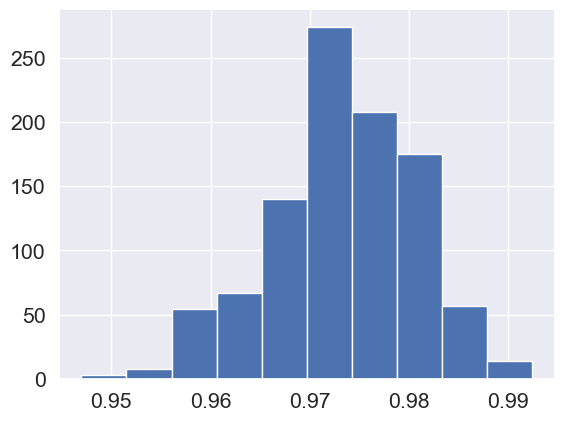

In [65]:
model_accuracies = []

#We check how the model does in 1000 iterations

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)
        
    clf = DecisionTreeClassifier()

    # Train the classifier on the training set
    clf.fit(training_inputs,training_classes)

    # Validate the classifier on the testing set using classification accuracy
    y_pred = clf.predict(testing_inputs)
    
    model_accuracies.append(accuracy_score(y_true = testing_classes, y_pred=y_pred))
        

plt.hist(model_accuracies)

Text(0.5, 1.0, 'Average score: 0.9772821203953279')

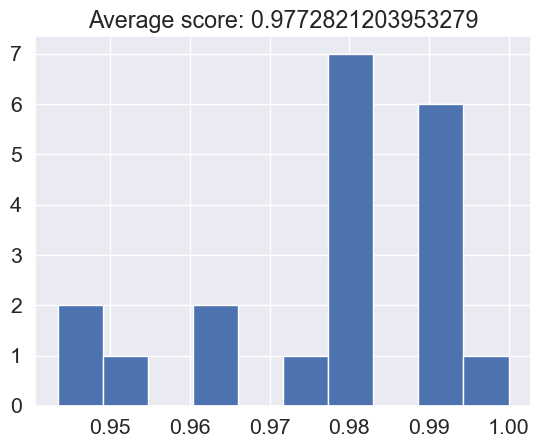

In [160]:
# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import numpy as np

cv_scores = cross_val_score(clf, all_inputs, all_labels, cv=20)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

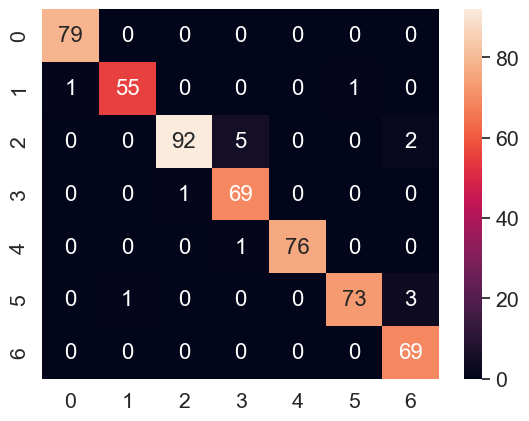

In [164]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

#The confusion matrix helps us now plot where the model got things wrong

conf_matrix = confusion_matrix(testing_classes, y_pred)

df_cm = pd.DataFrame(conf_matrix, range(7), range(7))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [157]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

#We now teste a SVM model and as you can see it shows great performance

clf = svm.SVC()

# Train the classifier on the training set
clf.fit(training_inputs,training_classes)


# Validate the classifier on the testing set using classification accuracy
y_pred = clf.predict(testing_inputs)
print("Train data accuracy:",accuracy_score(y_true = training_classes, y_pred=clf.predict(training_inputs)))
print("Test data accuracy:",accuracy_score(y_true = testing_classes, y_pred=y_pred))

Train data accuracy: 0.7454200884396716
Test data accuracy: 0.7727272727272727


(array([  5.,  13.,  50., 115., 189., 235., 195., 121.,  57.,  20.]),
 array([0.85416667, 0.86174242, 0.86931818, 0.87689394, 0.8844697 ,
        0.89204545, 0.89962121, 0.90719697, 0.91477273, 0.92234848,
        0.92992424]),
 <BarContainer object of 10 artists>)

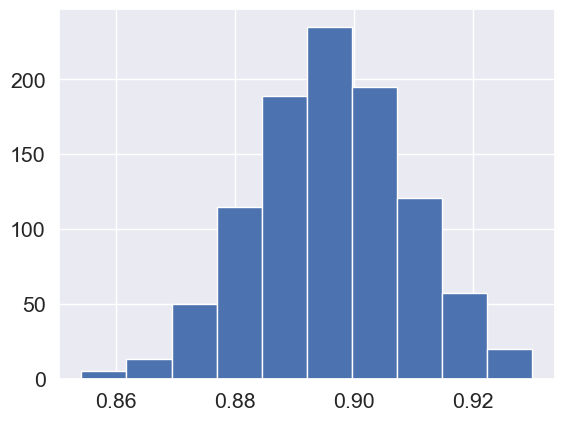

In [77]:
model_accuracies = []

#Once more we check its performance in a 1000 iteration

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)
        
    clf = svm.SVC()

    # Train the classifier on the training set
    clf.fit(training_inputs,training_classes)


    # Validate the classifier on the testing set using classification accuracy
    y_pred = clf.predict(testing_inputs)
    
    model_accuracies.append(accuracy_score(y_true = testing_classes, y_pred=y_pred))
        

plt.hist(model_accuracies)

Text(0.5, 1.0, 'Average score: 0.9005673758865246')

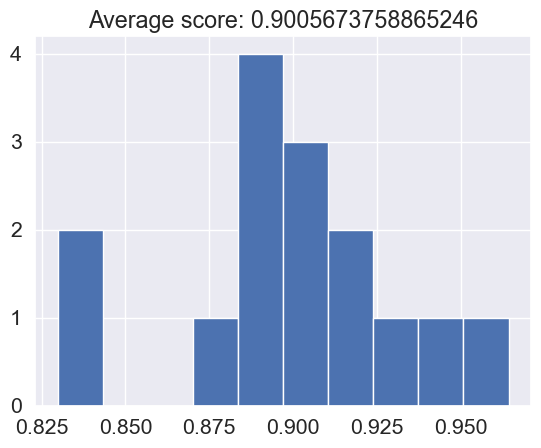

In [78]:
# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(clf, all_inputs, all_labels, cv=15)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

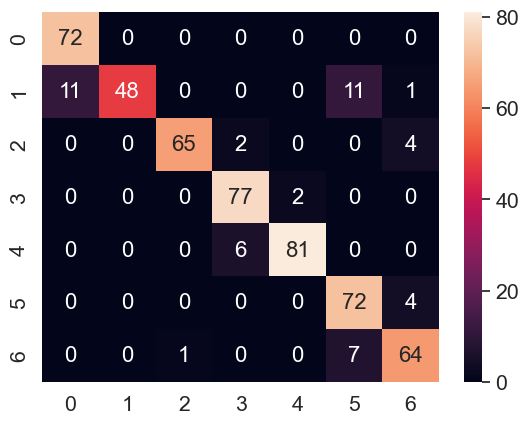

In [79]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

#The confusion matrix helps us now plot where the model got things wrong

conf_matrix = confusion_matrix(testing_classes, y_pred)

df_cm = pd.DataFrame(conf_matrix, range(7), range(7))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [83]:
from sklearn.neighbors import KNeighborsClassifier

#We now try the nearest neighbor as it is very easy to train and gives us a banch mark to compare all other models

neigh = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training set
neigh.fit(training_inputs,training_classes)

# Validate the classifier on the testing set using classification accuracy
y_pred = neigh.predict(testing_inputs)
print("Train data accuracy:",accuracy_score(y_true = training_classes, y_pred=neigh.predict(training_inputs)))
print("Test data accuracy:",accuracy_score(y_true = testing_classes, y_pred=y_pred))

Train data accuracy: 0.9722046746683513
Test data accuracy: 0.9583333333333334


(array([  4.,  13.,  48., 112., 107., 220., 241., 176.,  62.,  17.]),
 array([0.92045455, 0.92575758, 0.93106061, 0.93636364, 0.94166667,
        0.9469697 , 0.95227273, 0.95757576, 0.96287879, 0.96818182,
        0.97348485]),
 <BarContainer object of 10 artists>)

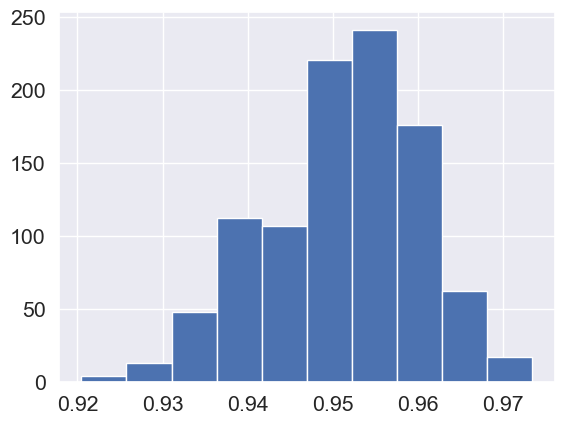

In [84]:
model_accuracies = []

#We see how it averages on 1000 iterations

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)
        
    neigh = KNeighborsClassifier(n_neighbors=3)

    # Train the classifier on the training set
    neigh.fit(training_inputs,training_classes)


    # Validate the classifier on the testing set using classification accuracy
    y_pred = neigh.predict(testing_inputs)
    
    model_accuracies.append(accuracy_score(y_true = testing_classes, y_pred=y_pred))
        

plt.hist(model_accuracies)

Text(0.5, 1.0, 'Average score: 0.954062816616008')

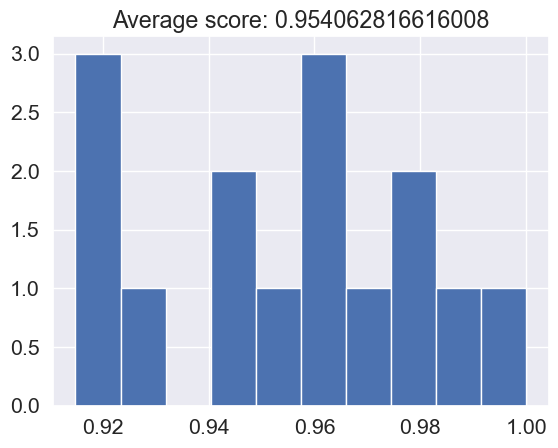

In [85]:
# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(neigh, all_inputs, all_labels, cv=15)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

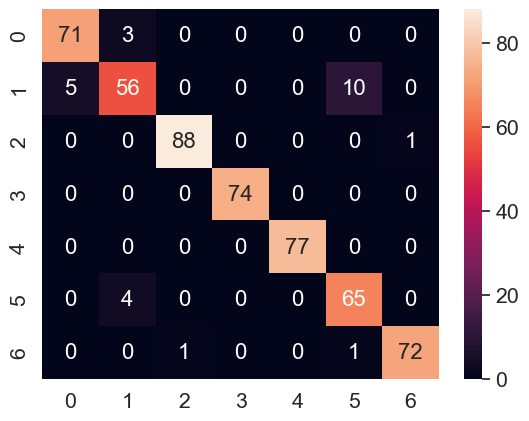

In [86]:
y_true = testing_classes
confusion_matrix(y_true, y_pred)

#We see in this conf matrix that the nearest neighbor although having a good performance has classifing errors that skip 
#entre classifiers

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import mean_squared_error

conf_matrix = confusion_matrix(y_true, y_pred)

df_cm = pd.DataFrame(conf_matrix, range(7), range(7))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [94]:
from sklearn.neural_network import MLPClassifier

#Finally we use mlp which gives us a terrible performance, for it to better work we need significantly kore data
#than we have now
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(training_inputs,training_classes)

# Validate the classifier on the testing set using classification accuracy
y_pred = clf.predict(testing_inputs)
print("Train data accuracy:",accuracy_score(y_true = training_classes, y_pred=clf.predict(training_inputs)))
print("Test data accuracy:",accuracy_score(y_true = testing_classes, y_pred=y_pred))

Train data accuracy: 0.15919140871762477
Test data accuracy: 0.1875


(array([  6.,  18.,  45.,  58., 158., 252., 200., 160.,  87.,  16.]),
 array([0.11174242, 0.12064394, 0.12954545, 0.13844697, 0.14734848,
        0.15625   , 0.16515152, 0.17405303, 0.18295455, 0.19185606,
        0.20075758]),
 <BarContainer object of 10 artists>)

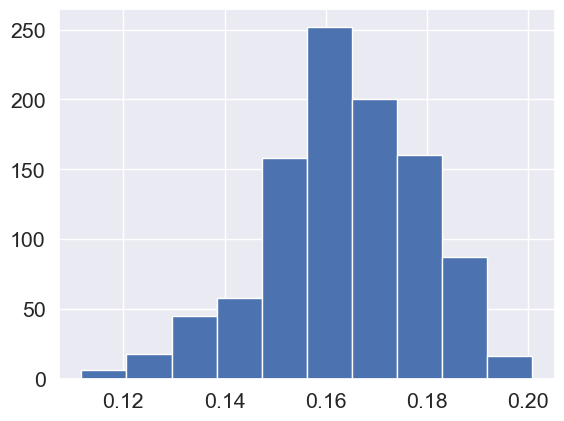

In [95]:
model_accuracies = []

#We see that the performance does not deviate much from 0.165 in 1000 iterations

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)
        
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

    clf.fit(training_inputs,training_classes)


    # Validate the classifier on the testing set using classification accuracy
    y_pred = clf.predict(testing_inputs)
    
    model_accuracies.append(accuracy_score(y_true = testing_classes, y_pred=y_pred))
        

plt.hist(model_accuracies)

Text(0.5, 1.0, 'Average score: 0.16627828436339073')

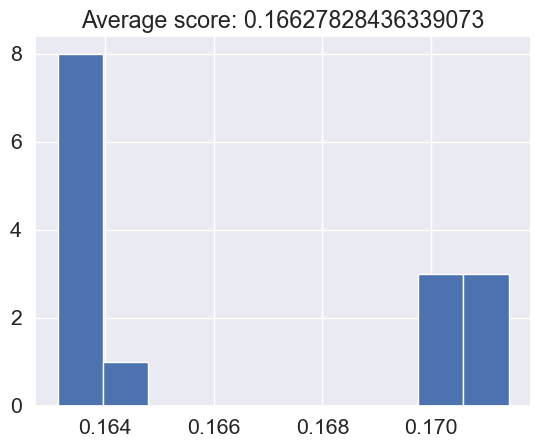

In [96]:
cv_scores = cross_val_score(clf, all_inputs, all_labels, cv=15)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#Finally we use grid search and tweak its hyper parameters to find out the best performance of our two best algorithms, SVM and 
#Decision trees and we see we 

decision_tree_classifier = DecisionTreeClassifier(max_depth=1, max_features=1)

parameter_grid = {'max_depth': [1, 40],
                  'max_features': [1, 17]} #Change max_features to the number of features

cross_validation = StratifiedKFold(n_splits=15)
grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9758628841607566
Best parameters: {'max_depth': 40, 'max_features': 17}


In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

svm_classifier = svm.SVC()

parameter_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

cross_validation = StratifiedKFold(n_splits=15)
grid_search = GridSearchCV(svm_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.973498817966903
Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()

parameter_grid = {'n_neighbors': [3, 5, 7],
                  'weights': ['uniform', 'distance'],
                  'p': [1, 2]}

cross_validation = StratifiedKFold(n_splits=15)

grid_search = GridSearchCV(knn_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9668152651131375
Best parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
